## ベイズの展開公式(Ⅰ)


### ベイズの基本公式
$$
\begin{align}
P(H|D) &= \frac{P(D|H)P(H)}{P(D)}
\end{align}
$$


$H$を原因、$D$を結果とする  
$ P(H|D) $ : 事後確率 (結果$D$が原因$H$より得られる確率)  
$ P(D|H) $ : 尤度 (原因$H$のもとで結果$D$が得られる確率)  
$ P(H) $ : 事前確率 (結果$D$を得る前の原因$H$が起こる確率)

### ベイズの展開公式
原因$H$が$n$個ある場合
$$
\begin{align}
P(D) &= P(D \cap H_{1}) + P(D \cap H_{2}) + ... + P(D \cap H_{n})\\
&= \sum _{k=1} ^{n}{P(D \cap H_{k})}
\end{align}
$$

$
\begin{align}
P(D \cap H) &= P(H|D)P(D)\\
\end{align}
$
により、

$$
\begin{align}
P(D) &= P(H_{1}|D)P(D) + P(H_{2}|D)P(D) + ... + P(H_{n}|D)P(D)\\
&= \sum _{k=1} ^{n}{ P(H_{k}|D)P(D)}
\end{align}
$$

したがって、結果$D$が原因$H_{i}$より得られる確率は  
$$
\begin{align}
P(H_{i}|D) &= \frac{P(D|H_{i})P(H_{i})}{P(D|H_{1})P(H_{1}) + P(D|H_{2})P(H_{2}) + ... + P(D|H_{n})P(H_{n})}\\  
&= \frac{P(D|H_{i})P(H_{i})}{\sum _{k=1} ^{n}{P(D|H_{k})P(H_{k})}}
\end{align}
$$

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 初期設定
stats = ["R","G","B"]
box = [[2,8,3],[8,3,6],[3,6,4]]
d_n = len(stats) # 結果の数
h_n = len(box) # 原因の数

In [7]:
def Likelihood(H):
    prob2 = []
    for i in range(d_n):
        prob = []
        for j in range(h_n):
            prob.append(box[j][i]/sum(box[j]))
        prob2.append(prob)
    return prob2

In [8]:
def calc(X,H):
    a_prob = []
    k = stats.index(X)
    prob2 =Likelihood(H)
    prob3 = []
    for i in range(h_n):
        prob3.append(prob2[k][i]*H[i])
    sum_prob = sum(prob3)
    for j in range(h_n):
        a_prob.append((prob2[k][j]*H[j])/(sum_prob))
        
    return a_prob

In [9]:
def draw(Y):
    x=[]
    y=[]
    x = [i for i in range(len(select))]
    for i in range(h_n):
        y =  [Y[j][i] for j in range(len(select))]
        plt.plot(x,y,linewidth=2, color="red")
        plt.title("box{}".format(i+1))
        plt.xlabel("Number of trials")
        plt.ylabel("probability")
        plt.grid(True)
        plt.figure()

In [13]:
select = ["R","R","R","G","R","R","G"]

In [14]:
H = [1.0/h_n for i in range(h_n)]
change = []
for i in range(len(select)):
    ans = calc(select[i],H)
    change.append(ans)
    H = ans 
    print("{}回目:{}を取る".format(i+1,select[i]))
    for j in range(h_n):
        print("箱{}:".format(j+1),ans[j])
    print("------------------------------------------------")

1回目:Rを取る
箱1: 0.17989417989417988
箱2: 0.5502645502645502
箱3: 0.2698412698412699
------------------------------------------------
2回目:Rを取る
箱1: 0.07932477870033625
箱2: 0.7421944692239072
箱3: 0.1784807520757566
------------------------------------------------
3回目:Rを取る
箱1: 0.03030800751685471
箱2: 0.8674024671137607
箱3: 0.10228952536938467
------------------------------------------------
4回目:Gを取る
箱1: 0.08519095299384458
箱2: 0.6991694472404864
箱3: 0.21563959976566913
------------------------------------------------
5回目:Rを取る
箱1: 0.03344380751231158
箱2: 0.8395742358393803
箱3: 0.12698195664830805
------------------------------------------------
6回目:Rを取る
箱1: 0.011978328811727534
箱2: 0.9198013453777305
箱3: 0.06822032581054198
------------------------------------------------
7回目:Gを取る
箱1: 0.03664104447341887
箱2: 0.8068473065746923
箱3: 0.15651164895188885
------------------------------------------------


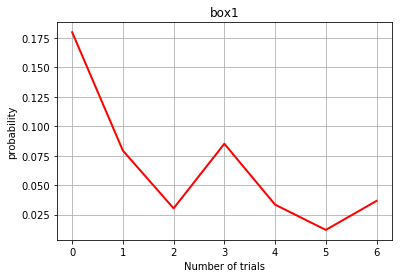

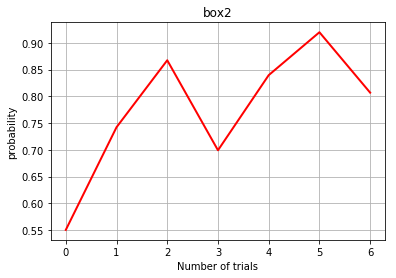

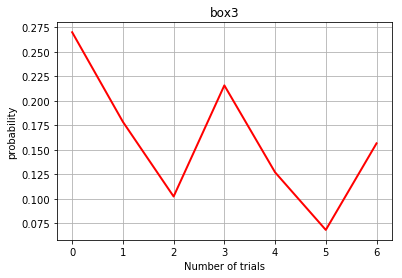

In [15]:
draw(change)